<a href="https://colab.research.google.com/github/MarkZuck10/forCNN/blob/main/preTrained/LeNet-Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import keras
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

## Loading Dataset

In [2]:
# Loading the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)
print("Number of classes:", np.unique(train_labels).size)
print("Unique classes:", np.unique(train_labels))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10
Unique classes: [0 1 2 3 4 5 6 7 8 9]


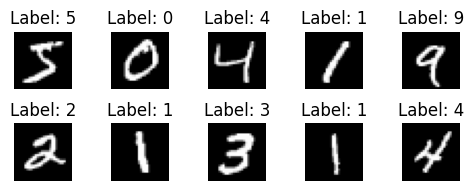

In [3]:
# Displaying few sample images
fig, axes = plt.subplots(2, 5, figsize=(5, 2))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title(f"Label: {train_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Preprocessing the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [5]:
# One-hot encoding the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## LeNet-5 Architecture

In [6]:
model = models.Sequential()

# Layer 1: Convolutional Layer (6 filters, 5x5 kernel, ReLU activation)
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))

# Subsampling Layer (2x2 MaxPooling)
model.add(layers.MaxPooling2D((2, 2)))

# Layer 2: Convolutional Layer (16 filters, 5x5 kernel, ReLU activation)
model.add(layers.Conv2D(16, (5, 5), activation='relu'))

# Subsampling Layer (2x2 MaxPooling)
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output
model.add(layers.Flatten())

# Fully Connected Layer 1 (120 units)
model.add(layers.Dense(120, activation='relu'))

# Fully Connected Layer 2 (84 units)
model.add(layers.Dense(84, activation='relu'))

# Output Layer (10 units for 10 classes in MNIST, softmax activation)
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Showing model architecture summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training of Model

In [9]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.8139 - loss: 0.6110 - val_accuracy: 0.9721 - val_loss: 0.0961
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.9741 - loss: 0.0875 - val_accuracy: 0.9783 - val_loss: 0.0700
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.9809 - loss: 0.0591 - val_accuracy: 0.9818 - val_loss: 0.0621
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9867 - loss: 0.0429 - val_accuracy: 0.9827 - val_loss: 0.0595
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9874 - loss: 0.0387 - val_accuracy: 0.9849 - val_loss: 0.0514
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9888 - loss: 0.0334 - val_accuracy: 0.9853 - val_loss: 0.0515
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9910 - loss: 0.0291 - val_accuracy: 0.9837 - val_loss: 0.0566
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9923 - loss: 0.0219 - 

## Evaluation

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9828 - loss: 0.0504
Test accuracy: 0.9867


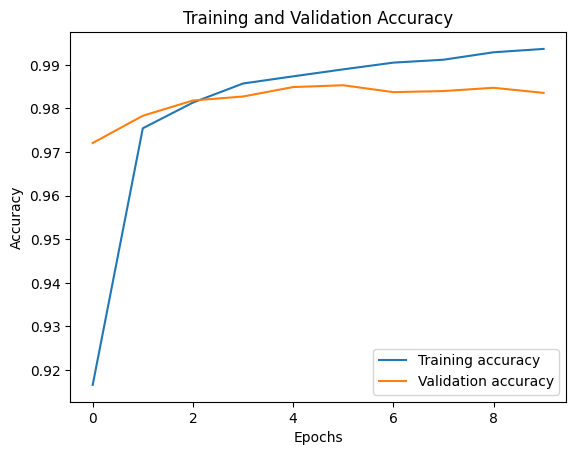

In [11]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()